In [12]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import statsmodels.api as sm

from sklearn.datasets import fetch_california_housing
import matplotlib.pyplot as plt

import seaborn as sns

from sklearn.model_selection import train_test_split
from statsmodels.miscmodels.ordinal_model import OrderedModel

# Processing OLS

In this first section, we will construct a linear model of to predict the household prices of California from the 1990s.

In [4]:
california = fetch_california_housing()

df = pd.DataFrame(california.data, columns=california.feature_names)

df['MedHouseVal'] = california.target

In [6]:
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [11]:
# Define the independent variables
X = df[["MedInc", "HouseAge", "AveRooms", "AveBedrms", "Population", "AveOccup"]]

# Define the dependent variable 
y = df['MedHouseVal']

# Add a constant (intercept)
X = sm.add_constant(X) # this is how statsmodels.api works, reqs a constant

In [8]:
# Fit the OLS regression model
ols_model = sm.OLS(y, X)
ols_results = ols_model.fit()

In [189]:
# Display the summary of the results
# print(ols_results.summary())

([<matplotlib.axis.YTick at 0x172c6ea10>,
 [Text(0, 0, 'const'),
  Text(0, 1, 'AveRooms'),
  Text(0, 2, 'AveOccup'),
  Text(0, 3, 'Population'),
  Text(0, 4, 'HouseAge'),
  Text(0, 5, 'MedInc'),
  Text(0, 6, 'AveBedrms')])

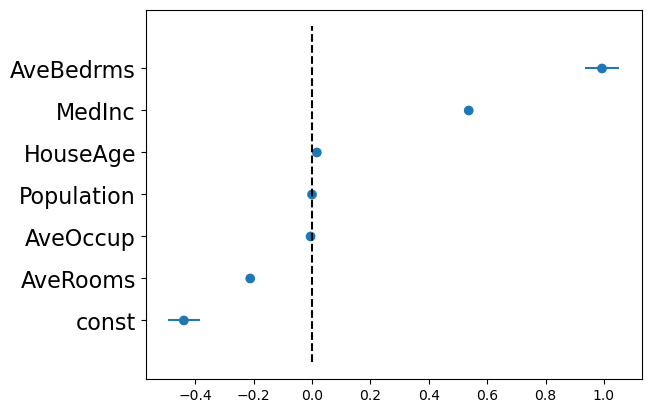

In [10]:
R = ols_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

# Logistic Regression

Your turn: Using the Titanic dataset and the variables below, created a logistic regression model for whether individuals survived or not.
* IVs: 'pclass', 'age', "sibsp", "fare", "adult_male"
* DV: "survived"

In [105]:
# Load the Titanic dataset
df = sns.load_dataset('titanic')
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [106]:
# Your code here
from sklearn.linear_model import LogisticRegression 

# Subset
df = df[['pclass','age','sibsp','fare','adult_male','survived']]

# Check dtypes
df.dtypes

pclass          int64
age           float64
sibsp           int64
fare          float64
adult_male       bool
survived        int64
dtype: object

In [107]:
from sklearn.preprocessing import OneHotEncoder
df['adult_male'] = OneHotEncoder(drop = 'first').fit_transform(df[['adult_male']]).toarray()
# verify the above worked 
df.dtypes

pclass          int64
age           float64
sibsp           int64
fare          float64
adult_male    float64
survived        int64
dtype: object

In [202]:
# impute na values
df['age'].fillna(df['age'].mean(), inplace = True)

In [203]:
# verify the above
df.isna().sum()

pclass        0
age           0
sibsp         0
fare          0
adult_male    0
survived      0
dtype: int64

In [205]:
##
import numpy as np

# create X,y
y =  df[['survived']]
X = df.drop(columns = 'survived')

# Add a constant (intercept)
X = sm.add_constant(X)

# Fit the logistic regression model
logit_model = sm.Logit(y, X)
logit_results = logit_model.fit()

print(logit_results.summary())


Optimization terminated successfully.
         Current function value: 0.423438
         Iterations 6
                           Logit Regression Results                           
Dep. Variable:                      y   No. Observations:                  891
Model:                          Logit   Df Residuals:                      885
Method:                           MLE   Df Model:                            5
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.3641
Time:                        18:09:13   Log-Likelihood:                -377.28
converged:                       True   LL-Null:                       -593.33
Covariance Type:            nonrobust   LLR p-value:                 3.584e-91
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          4.4657      0.529      8.435      0.000       3.428       5.503
pclass        -1.0760      0.

([<matplotlib.axis.YTick at 0x17e0bed50>,
 [Text(0, 0, 'adult_male'),
  Text(0, 1, 'pclass'),
  Text(0, 2, 'sibsp'),
  Text(0, 3, 'age'),
  Text(0, 4, 'fare'),
  Text(0, 5, 'const')])

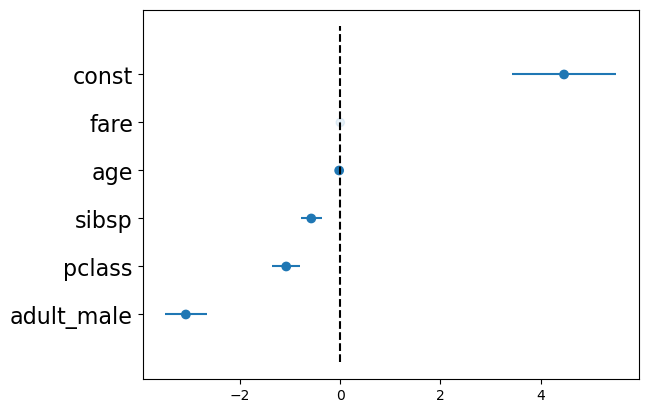

In [206]:
R = logit_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]
R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)
p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p
plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)
plt.vlines(0,0-1,len(R), linestyle="--", color = "black")
plt.yticks(R.index,R.vari, fontsize=16)
# # ## split
# X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.25)

# # # fit and make predictions
# fit = LogisticRegression().fit(X_train, y_train)
# predictions = fit.predict(X_test)

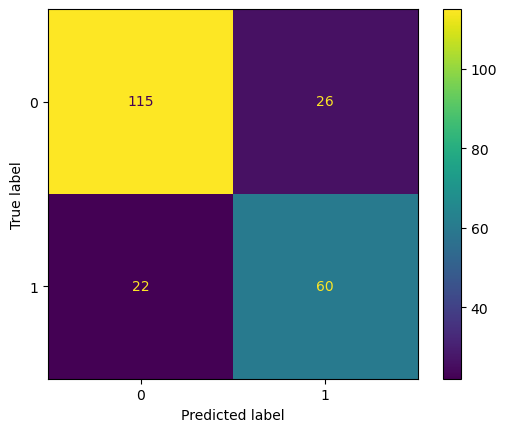

In [103]:
import sklearn.metrics as metrics 

cm = metrics.confusion_matrix(y_test,predictions, labels = fit.classes_)
disp = metrics.ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = fit.classes_)
disp.plot()

## Multinomial Regression

The UCI dataset with ID 109 is the Wine Quality Dataset, which contains information about different types of wines, including several chemical properties and a quality rating. Since the quality ratings are on a scale from 0 to 10, this dataset is ideal for multinomial logistic regression, where the goal is to predict the quality of wine based on its chemical properties.

For this exercise, you will want to use sm.MNLogit. Then, plot the two forest plots in the same figure. (For an example, see this figure-- https://academic.oup.com/view-large/figure/447695951/pgae130f3.tif )

In [210]:
# fetch dataset 
wine = fetch_ucirepo(id=109) 
df1 = wine['data']['features']
df2 = wine['data']['targets']

In [211]:
# your code here
df1.head()


,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [212]:
df2['class'].unique()

array([1, 2, 3])

In [213]:
total = pd.concat([df1,df2])
total = total.fillna(total.mean())


In [222]:

from sklearn.datasets import fetch_openml
wine_data = fetch_openml(data_id=187)
wine_data_df = pd.DataFrame(wine_data['data'])
wine_targets_df = pd.DataFrame(wine_data['target'])

y = wine_targets_df['class']
# X = total.drop(columns = 'class')
X = wine_data_df[['Alcohol', 'Malic_acid', 'Ash', 'Alcalinity_of_ash', 'Magnesium', 'Total_phenols', 
               'Proanthocyanins']]


X = sm.add_constant(X)
mnlogit_mod = sm.MNLogit(y, X)
fit = mnlogit_mod.fit()

print(fit.summary())


Optimization terminated successfully.
         Current function value: 0.171358
         Iterations 12
                          MNLogit Regression Results                          
Dep. Variable:                  class   No. Observations:                  178
Model:                        MNLogit   Df Residuals:                      162
Method:                           MLE   Df Model:                           14
Date:                Thu, 19 Sep 2024   Pseudo R-squ.:                  0.8422
Time:                        18:21:34   Log-Likelihood:                -30.502
converged:                       True   LL-Null:                       -193.31
Covariance Type:            nonrobust   LLR p-value:                 5.251e-61
          class=2       coef    std err          z      P>|z|      [0.025      0.975]
-------------------------------------------------------------------------------------
const               121.9421     45.068      2.706      0.007      33.611     210.274
Alcohol

/opt/anaconda3/lib/python3.11/site-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


In [ ]:
R = ols_results.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R[R.columns[1:]] = R[R.columns[1:]].astype(float)
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

In [201]:
R = fit.summary().tables[1].data
R = pd.DataFrame(R)
R.columns = R.iloc[0]
R = R.iloc[1:]
R.columns = ["vari", "coef", "std_err", "t", "p_val", "low_b", "up_b" ]

R = R.sort_values("coef", ascending = True)
R = R.reset_index(drop=True)

p = 0.1
R["alpha"] = (R.p_val.apply(lambda x: float(x)) < 0.05 ) * (1-p) + p

plt.hlines(R.index, R.low_b, R.up_b, alpha = R.alpha)
plt.scatter(R.coef, R.index, alpha = R.alpha)

plt.vlines(0,0-1,len(R), linestyle="--", color = "black")

plt.yticks(R.index,R.vari, fontsize=16)

ValueError: could not convert string to float: 'P>|z|'